In [1]:
import os
import sys
os.chdir("..") 
%matplotlib inline

********************

   Going to generate c302_C2_IClampBWM and run for 1000 on jNeuroML

********************
Set default parameters for C
Set default parameters for C2
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
Opened file: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/../../../herm_full_edgelist.csv
c302      >>>  Positioning muscle: MDR01 at (80,-270,80)
c302      >>>  Writing generated network to: /home/developer/forks/CElegansNeuroML/CElegans/pythonScripts/c302/examples/c302_C2_IClampBWM.nml
Validating examples/c302_C2_IClampBWM.nml against /usr/local/lib/python2.7/dist-packages/neuroml/nml/NeuroML_v2beta4.xsd
It's valid!
(Re)written network file to: examples/c302_C2_IClampBWM.nml
c302      >>>  Finished simulation of LEMS_c302_C2_IClampBWM.xml and have reloaded results
c302      >>>  Reloaded data: ['MDR01/0/GenericMuscleCell/caConc', 'AVAL/0/GenericNeuronCell/caConc', 'MDR01/0/GenericMuscle

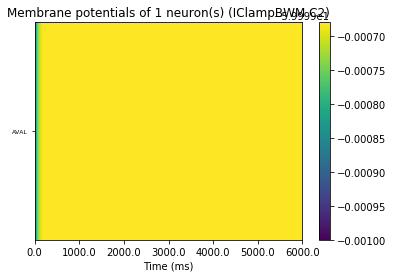

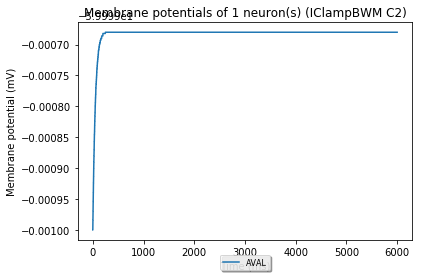

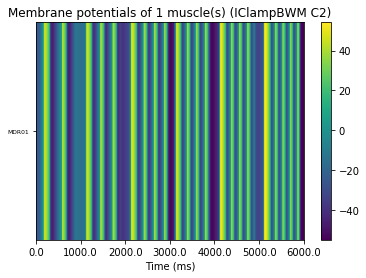

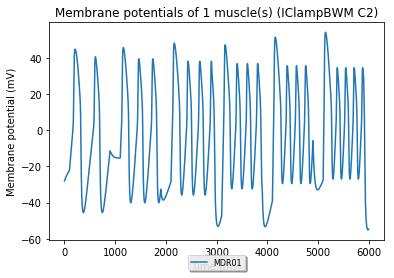

In [2]:
from runAndPlot import run_c302
cells, cells_to_stimulate, params, muscles = run_c302('IClampBWM','C2','',1000,0.05,'jNeuroML',verbose=False,plot_ca=False, data_reader="UpdatedSpreadsheetDataReader")